<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


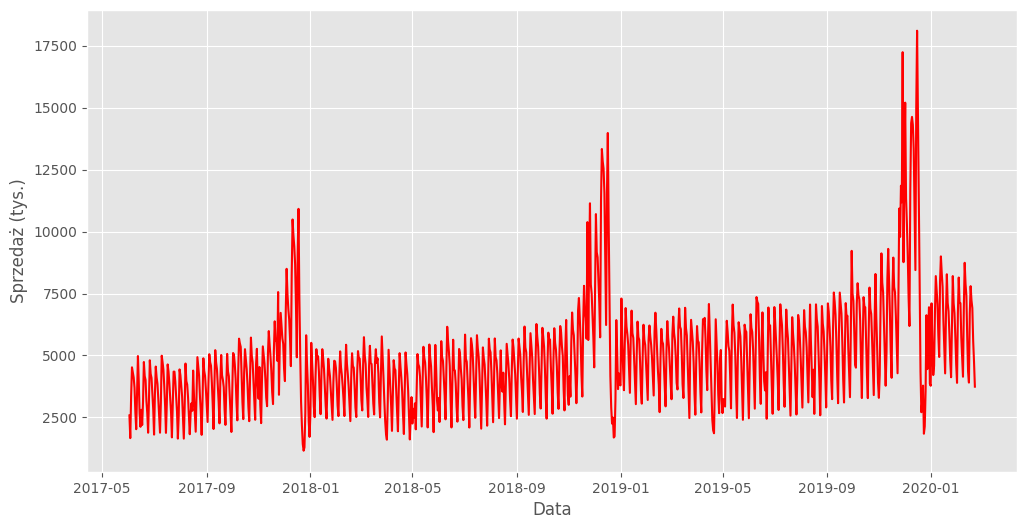

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('ggplot')

allegro = pd.read_csv(r'RTV-AGD_awa.csv', index_col='DATA', parse_dates=['DATA'])

plt.figure(figsize=(12,6))
plt.plot(allegro['WARTOSC(TYS.)'], color='red')
plt.xlabel('Data')
plt.ylabel('Sprzedaż (tys.)')
text1 = "jest stacjonarny z prawdopodobieństwem wynoszącym"
text2 = "Szereg czasowy"
k1 = " stacjonarny z prawdopodobieństwem wynoszącym "
k2 = " Szereg czasowy "

plt.show()

In [3]:
allegro.dtypes

DZIEN              int64
WARTOSC(TYS.)    float64
dtype: object

In [4]:
print(allegro['DZIEN'].unique())

[5 6 7 1 2 3 4]


WIZUALIZACJA

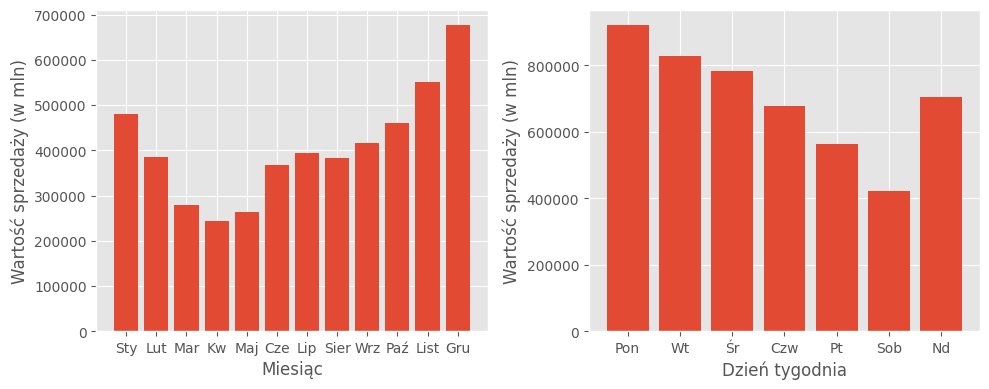

In [5]:
df = pd.read_csv('RTV-AGD_awa.csv')
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
suma_sprzedazy_miesiac = df.groupby('MIESIAC')['WARTOSC(TYS.)'].sum()
suma_sprzedazy_dzien = df.groupby('DZIEN')['WARTOSC(TYS.)'].sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.bar(suma_sprzedazy_miesiac.index, suma_sprzedazy_miesiac)
ax1.set_xlabel('Miesiąc')
ax1.set_ylabel('Wartość sprzedaży (w mln)')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Sty', 'Lut', 'Mar', 'Kw', 'Maj', 'Cze', 'Lip','Sier','Wrz','Paź','List','Gru'])
ax2.bar(suma_sprzedazy_dzien.index, suma_sprzedazy_dzien)
ax2.set_xlabel('Dzień tygodnia')
ax2.set_ylabel('Wartość sprzedaży (w mln)')
ax2.set_xticks(range(1, 8))
ax2.set_xticklabels(['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Nd'])
plt.tight_layout()
plt.show()

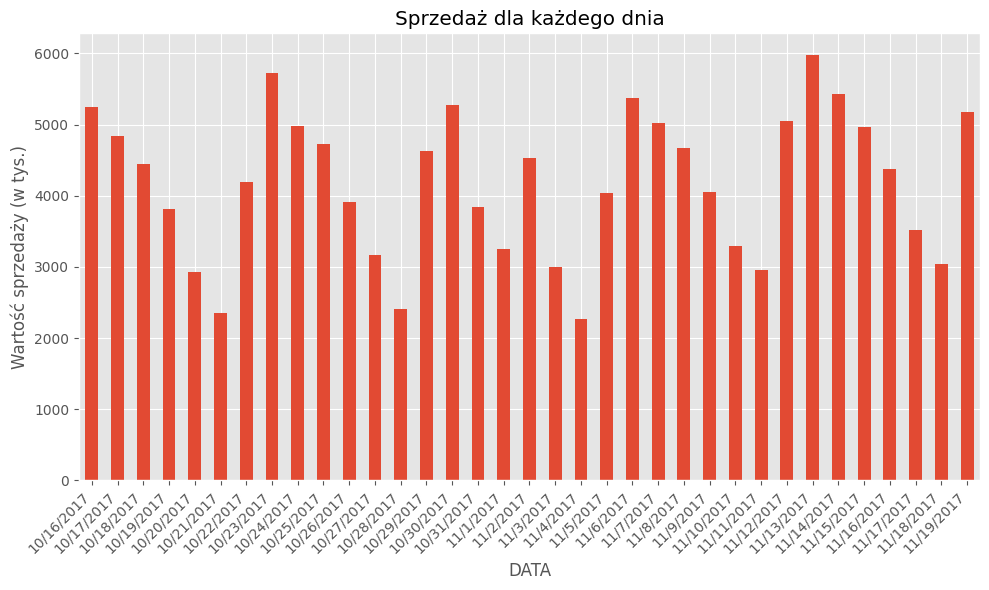

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
df = pd.read_csv('RTV-AGD_awa.csv')

# Wyszukiwanie indeksu pierwszego poniedziałku od wiersza 130
pon_index = df['DZIEN'].loc[130:].idxmin()
selected_rows = df.loc[pon_index:pon_index + 34]
fig, ax = plt.subplots(figsize=(10, 6))
selected_rows.plot(x='DATA', y='WARTOSC(TYS.)', kind='bar', ax=ax, legend=False)
ax.set_xticklabels(selected_rows['DATA'], rotation=45, ha='right')
ax.set_ylabel('Wartość sprzedaży (w tys.)')
ax.set_title('Sprzedaż dla każdego dnia')
plt.tight_layout()
plt.show()

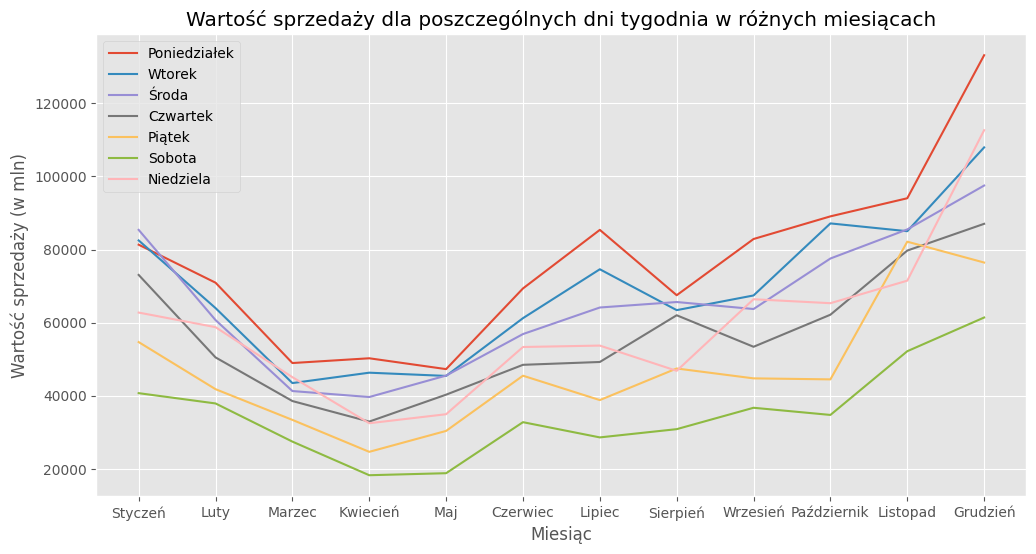

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RTV-AGD_awa.csv')
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
suma_sprzedazy_dzien_miesiac = df.groupby(['DZIEN', 'MIESIAC'])['WARTOSC(TYS.)'].sum()
nazwy_dni = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
plt.figure(figsize=(12, 6))
for dzien in range(1, 8):
    wartosci_sprzedazy = suma_sprzedazy_dzien_miesiac[dzien].values
    plt.plot(wartosci_sprzedazy, label=nazwy_dni[dzien - 1])
plt.xlabel('Miesiąc')
plt.ylabel('Wartość sprzedaży (w mln)')
plt.title('Wartość sprzedaży dla poszczególnych dni tygodnia w różnych miesiącach')
plt.xticks(range(12), ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'])
plt.legend()
plt.grid(True)
plt.show()

MAPA CIEPŁA

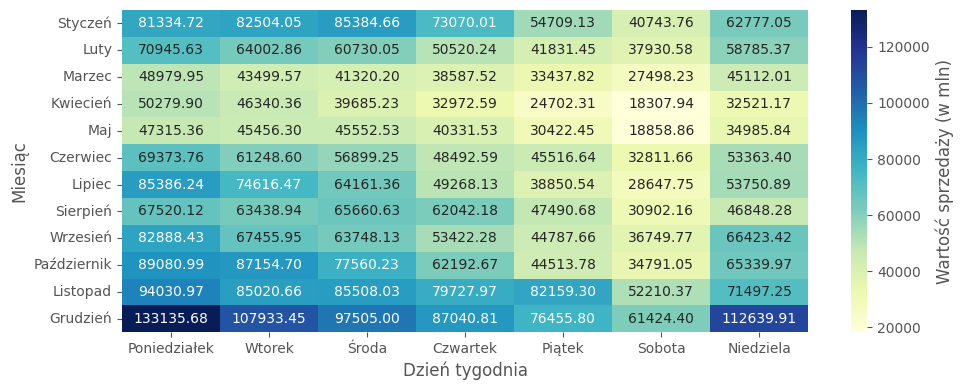

In [8]:
import seaborn as sns

plt.style.use('ggplot')
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
day_labels = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
df['DZIEN_TYG'] = df['DATA'].dt.dayofweek
df['DZIEN_TYG'] = pd.Categorical(df['DZIEN_TYG'], categories=np.arange(7), ordered=True)
df['DZIEN_TYG'] = df['DZIEN_TYG'].map(lambda x: day_labels[x])
pivot_df = df.pivot_table(index='MIESIAC', columns='DZIEN_TYG', values='WARTOSC(TYS.)', aggfunc='sum')
month_labels = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 
                'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień']
pivot_df.index = month_labels
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Wartość sprzedaży (w mln)'})
plt.xlabel('Dzień tygodnia')
plt.ylabel('Miesiąc')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

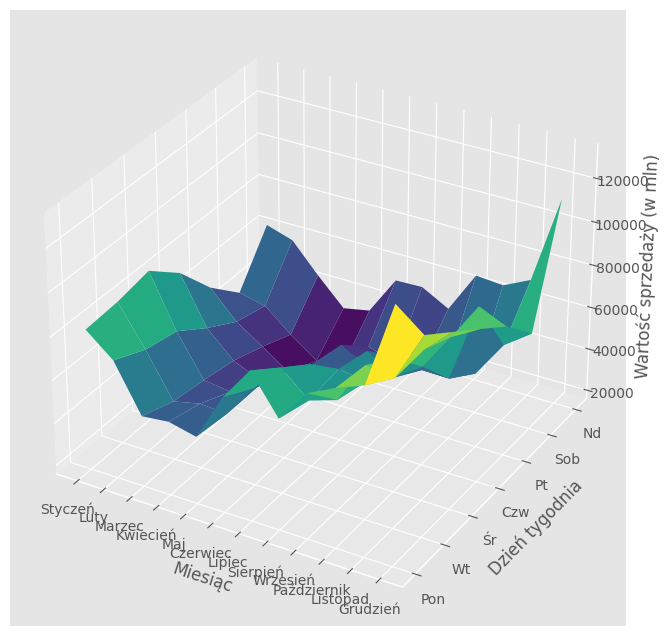

In [9]:
from mpl_toolkits.mplot3d import Axes3D
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
suma_sprzedazy_dzien_miesiac = df.groupby(['DZIEN', 'MIESIAC'])['WARTOSC(TYS.)'].sum()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
miesiace = range(1, 13)
dni_tygodnia = range(1, 8)
X, Y = np.meshgrid(miesiace, dni_tygodnia)
Z = []
for dzien in dni_tygodnia:
    wartosci_sprzedazy = suma_sprzedazy_dzien_miesiac[dzien].values
    Z.append(wartosci_sprzedazy)
Z = np.array(Z)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Dzień tygodnia')
ax.set_zlabel('Wartość sprzedaży (w mln)')
ax.set_xticks(miesiace)
ax.set_xticklabels(['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'])
ax.set_yticks(dni_tygodnia)
ax.set_yticklabels(['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Nd'])
plt.show

GENREROWANIE INTERAKTYWNEGO PLIKU HTML

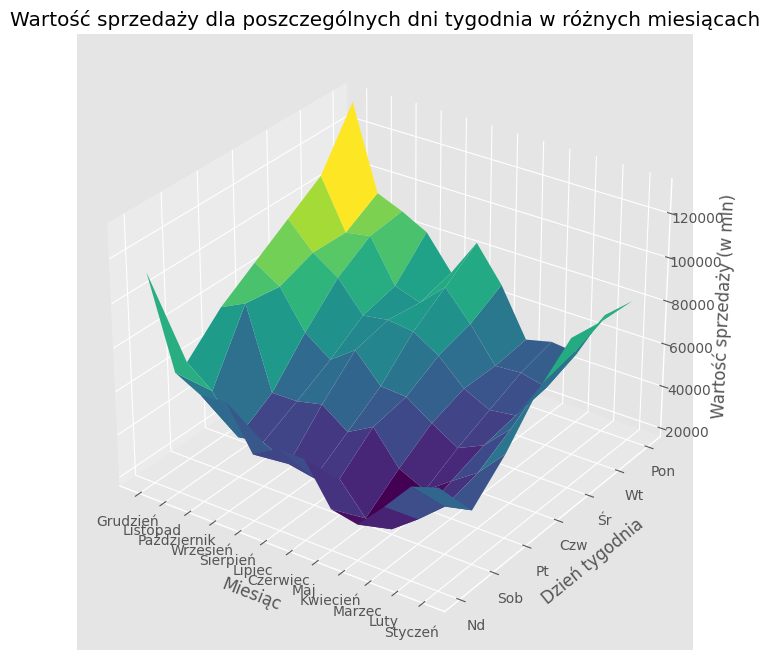

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('RTV-AGD_awa.csv')
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
suma_sprzedazy_dzien_miesiac = df.groupby(['DZIEN', 'MIESIAC'])['WARTOSC(TYS.)'].sum()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
miesiace = range(1, 13)
dni_tygodnia = range(1, 8)
X, Y = np.meshgrid(miesiace, dni_tygodnia)
Z = []
for dzien in dni_tygodnia:
    wartosci_sprzedazy = suma_sprzedazy_dzien_miesiac[dzien].values
    Z.append(wartosci_sprzedazy)
Z = np.array(Z)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.view_init(elev=29, azim=125)
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Dzień tygodnia')
ax.set_zlabel('Wartość sprzedaży (w mln)')
ax.set_xticks(miesiace)
ax.set_xticklabels(['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'])
ax.set_yticks(dni_tygodnia)
ax.set_yticklabels(['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Nd'])
plt.title('Wartość sprzedaży dla poszczególnych dni tygodnia w różnych miesiącach')
plt.show()

In [11]:
import plotly.graph_objects as go
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
suma_sprzedazy_dzien_miesiac = df.groupby(['DZIEN', 'MIESIAC'])['WARTOSC(TYS.)'].sum()
miesiace = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień',
            'Wrzesień', 'Październik', 'Listopad', 'Grudzień']
dni_tygodnia = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
mapowanie_dni = {'Poniedziałek': 1,'Wtorek': 2,'Środa': 3,'Czwartek': 4,'Piątek': 5,'Sobota': 6,'Niedziela': 7}
X, Y = np.meshgrid(list(range(1, 13)), list(range(1, 8)))
Z = []
for dzien in dni_tygodnia:
    wartosci_sprzedazy = suma_sprzedazy_dzien_miesiac[mapowanie_dni[dzien]].values
    Z.append(wartosci_sprzedazy)
Z = np.array(Z)
surface = go.Surface(
    x=X,
    y=Y,
    z=Z,
    colorscale='viridis'
)
scatter = go.Scatter3d(x=X.flatten(),y=Y.flatten(),z=Z.flatten(),mode='markers',
                        marker=dict(size=4,color=Z.flatten(),colorscale='viridis'))
lines = []
for dzien in range(len(dni_tygodnia)):
    x_values = X[:, dzien]
    y_values = Y[:, dzien]
    z_values = Z[:, dzien]
    line = go.Scatter3d(x=x_values,y=y_values,z=z_values,mode='lines',line=dict(color='black',width=2))
    lines.append(line)
layout = go.Layout(
    title='Wartość sprzedaży dla poszczególnych dni tygodnia w różnych miesiącach',
    scene=dict(
        xaxis=dict(title='Miesiąc', ticktext=miesiace, tickvals=list(range(1, 13))),
        yaxis=dict(title='Dzień tygodnia', ticktext=dni_tygodnia, tickvals=list(range(1, 8))),
        zaxis=dict(title='Wartość sprzedaży (w mln)')
    ),
    showlegend=False
)
fig = go.Figure(data=[surface, scatter] + lines, layout=layout)
fig.write_html('Interactive3D.html', auto_open=False)

STACJONARNOSC SZEREGU

In [12]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy surowe dane są stacjonarne?")
dftest = adfuller(df['WARTOSC(TYS.)'], autolag='AIC')
print("Statystyka testowa = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1]))) 

 > Czy surowe dane są stacjonarne?
Statystyka testowa = -4.053
Wartości krytyczne:
	1%: -3.437 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.865 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.568 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%


In [13]:
from statsmodels.tsa.stattools import kpss

print(" > Czy surowe dane są stacjonarne?")
p = kpss(df['WARTOSC(TYS.)'])
print("Statystyka testowa = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy surowe dane są stacjonarne?
Statystyka testowa = 2.260
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




TESTOWANIE SKŁADOWYCH SZEREGU

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('RTV-AGD_awa.csv')
print(" > Czy składowa trendu jest stacjonarna?")
seasonal_decomp = seasonal_decompose(df['WARTOSC(TYS.)'], period=7)
seasonal_component = seasonal_decomp.trend.dropna()
p = kpss(seasonal_component)
print("Statystyka testowa KPSS = {:.3f}".format(p[0]))
print("Wartości krytyczne:")
for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))
dftest = adfuller(seasonal_component)
print("Statystyka testowa ADF = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")
for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1])))    

 > Czy składowa trendu jest stacjonarna?
Statystyka testowa KPSS = 2.036
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%
Statystyka testowa ADF = -3.244
Wartości krytyczne:
	1%: -3.437 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.865 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.568 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('RTV-AGD_awa.csv')
print(" > Czy składowa sezonowa jest stacjonarna?")
seasonal_decomp = seasonal_decompose(df['WARTOSC(TYS.)'], period=7)
seasonal_component = seasonal_decomp.seasonal.dropna()
p = kpss(seasonal_component)
print("Statystyka testowa KPSS = {:.3f}".format(p[0]))
print("Wartości krytyczne:")
for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))
dftest = adfuller(seasonal_component)
print("Statystyka testowa ADF = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")
for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1])))   

 > Czy składowa sezonowa jest stacjonarna?
Statystyka testowa KPSS = 0.065
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Statystyka testowa ADF = -60781345664949168.000
Wartości krytyczne:
	1%: -3.437 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.865 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.568 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%


DEKOMPOZYCJE STL oraz KLASYCZYNA

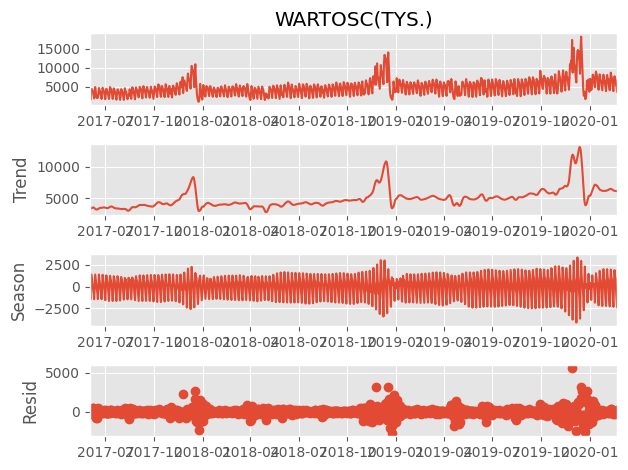

In [16]:
from statsmodels.tsa.seasonal import STL

df = pd.read_csv(r'RTV-AGD_awa.csv', index_col='DATA', parse_dates=['DATA'])
stl = STL(df['WARTOSC(TYS.)'], seasonal=7)
res = stl.fit()
fig = res.plot()

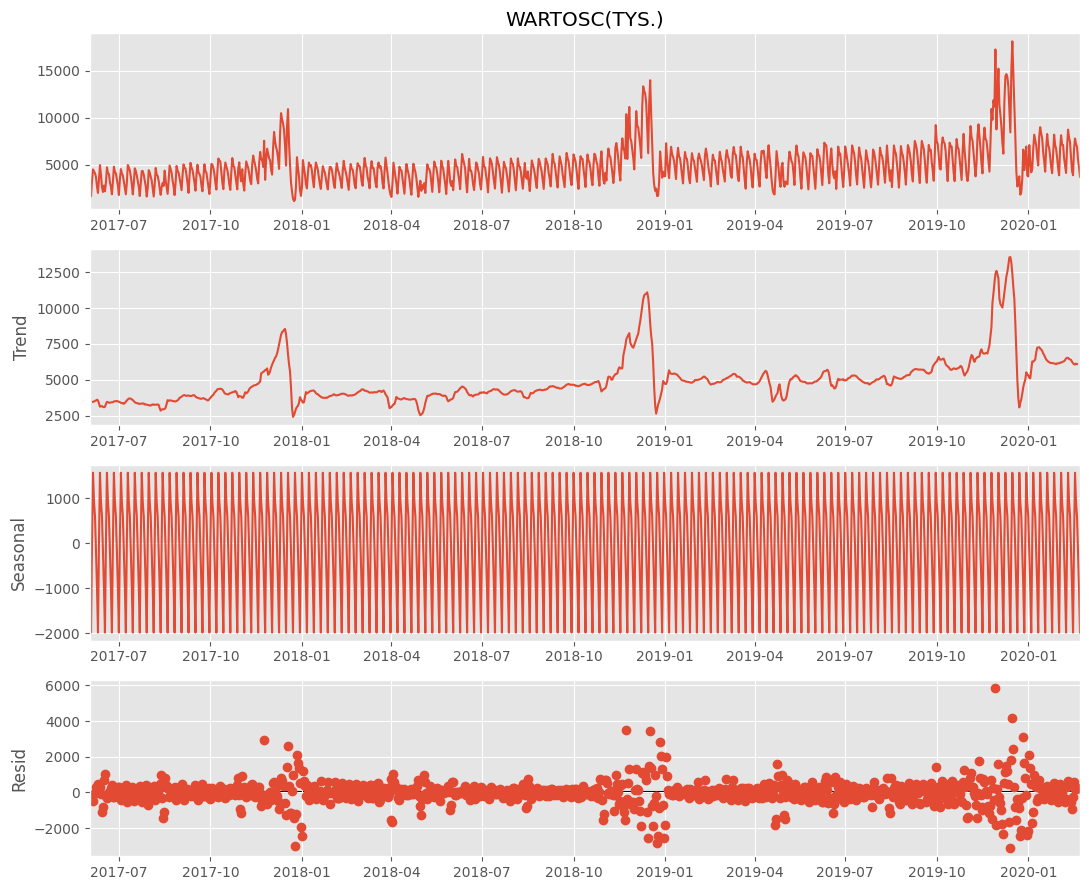

In [17]:
plt.rcParams['figure.figsize'] = 11, 9
decomposed_allegro_volume = sm.tsa.seasonal_decompose(allegro["WARTOSC(TYS.)"],period=7)
decomposed_allegro_volume.plot()
plt.show();

RÓŻNICOWANIE ZWYKŁE I SEZONOWE

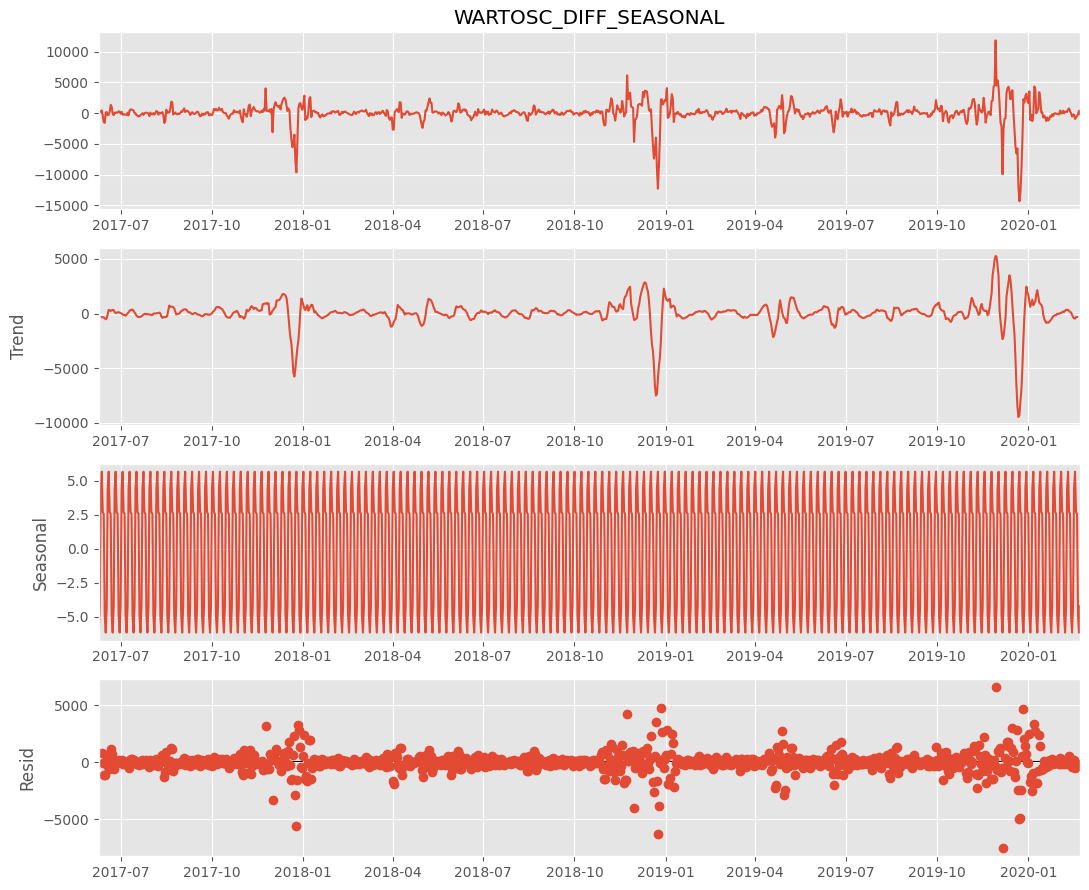

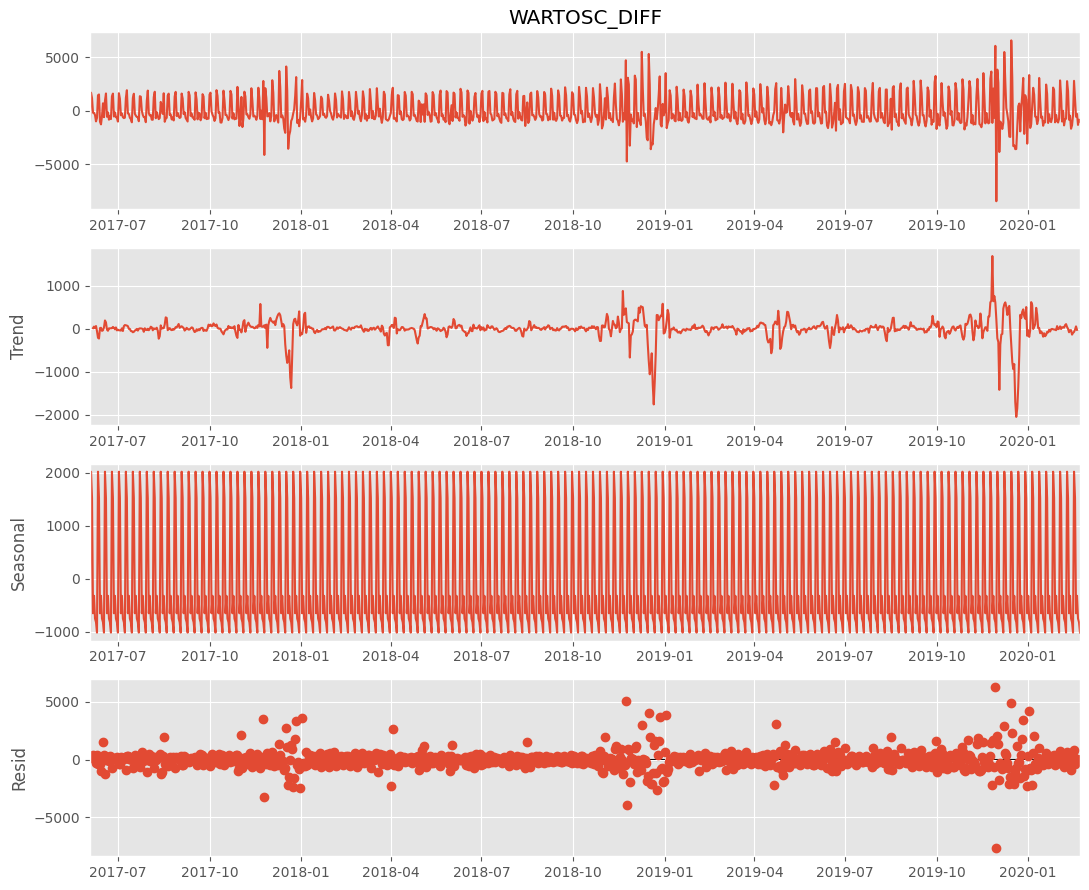

In [18]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = pd.read_csv('RTV-AGD_awa.csv')
df['DATA'] = pd.to_datetime(df['DATA'])
df.set_index('DATA', inplace=True)
df['WARTOSC_DIFF_SEASONAL'] = df['WARTOSC(TYS.)'].diff(7)
df_seas = df.iloc[7:]
seasonal_decomp = seasonal_decompose(df_seas['WARTOSC_DIFF_SEASONAL'], period=7)
seasonal_decomp.plot()
plt.show()
df['WARTOSC_DIFF'] = df['WARTOSC(TYS.)'].diff()
df_diff = df.iloc[1:]
decomposition = seasonal_decompose(df_diff['WARTOSC_DIFF'])
decomposition.plot()
plt.show()

ZMODYFIKOWANE RÓZNICOWANIE

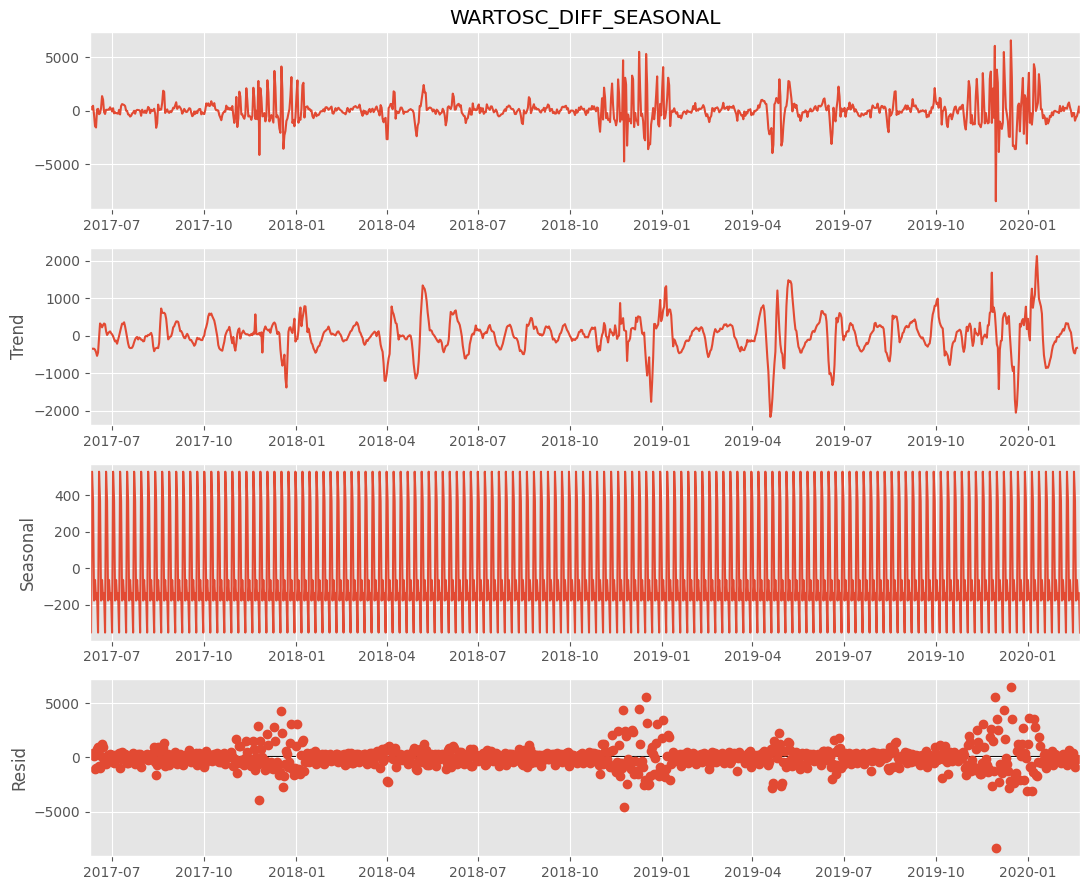

            DZIEN  WARTOSC(TYS.)  WARTOSC_DIFF_SEASONAL
DATA                                                   
2017-06-09      5        2695.47                 112.55
2017-06-10      6        2027.24                 360.05
2017-06-11      7        3465.13                 116.49
2017-06-12      1        4977.26                 454.70
2017-06-13      2        3941.39                -385.21
...           ...            ...                    ...
2020-02-18      2        7222.65                -665.63
2020-02-19      3        6915.18                -500.23
2020-02-20      4        5580.68                -139.80
2020-02-21      5        4738.46                 395.79
2020-02-22      6        3742.49                -164.59

[989 rows x 3 columns]


In [19]:
zmodyfikowane_roznicowanie = pd.read_csv(r'wynik_roznicowania.csv', index_col='DATA', parse_dates=['DATA'])

plt.rcParams['figure.figsize'] = 11, 9
decomposed_allegro_volume = sm.tsa.seasonal_decompose(zmodyfikowane_roznicowanie['WARTOSC_DIFF_SEASONAL'])
decomposed_allegro_volume.plot()
plt.show();

print(zmodyfikowane_roznicowanie)

OBLICZANIE ODCHYLENIA STANDARDOWEGO DO TABELKI

In [20]:
df_seas_nov_dec = df_seas.loc[(df_seas.index.month == 11) | (df_seas.index.month == 12)]
std_seas_nov_dec = np.std(df_seas_nov_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania sezonowego w listopadzie i grudniu:", std_seas_nov_dec)
df_diff_nov_dec = df_diff.loc[(df_diff.index.month == 11) | (df_diff.index.month == 12)]
std_diff_nov_dec = np.std(df_diff_nov_dec['WARTOSC_DIFF'])
print("Odchylenie standardowe dla różnicowania w listopadzie i grudniu:", std_diff_nov_dec)
df_diff_nov_dec = zmodyfikowane_roznicowanie.loc[(zmodyfikowane_roznicowanie.index.month == 11) | (zmodyfikowane_roznicowanie.index.month == 12)]
std_diff_nov_dec = np.std(df_diff_nov_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania mod w listopadzie i grudniu:", std_diff_nov_dec)


Odchylenie standardowe dla różnicowania sezonowego w listopadzie i grudniu: 3524.4192418846033
Odchylenie standardowe dla różnicowania w listopadzie i grudniu: 2161.9090288934844
Odchylenie standardowe dla różnicowania mod w listopadzie i grudniu: 2161.9090288934844


In [21]:
import numpy as np
df_seas_ex_nov_dec = df_seas.loc[(df_seas.index.month != 11) & (df_seas.index.month != 12)]
std_seas_ex_nov_dec = np.std(df_seas_ex_nov_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania sezonowego bez listopada i grudnia:", std_seas_ex_nov_dec)
df_diff_ex_nov_dec = df_diff.loc[(df_diff.index.month != 11) & (df_diff.index.month != 12)]
std_diff_ex_nov_dec = np.std(df_diff_ex_nov_dec['WARTOSC_DIFF'])
print("Odchylenie standardowe dla różnicowania bez listopada i grudnia:", std_diff_ex_nov_dec)
df_diff_ex_nov_dec = zmodyfikowane_roznicowanie.loc[(zmodyfikowane_roznicowanie.index.month != 11) & (zmodyfikowane_roznicowanie.index.month != 12)]
std_diff_ex_nov_dec = np.std(df_diff_ex_nov_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania mod bez listopada i grudnia:", std_diff_ex_nov_dec)

Odchylenie standardowe dla różnicowania sezonowego bez listopada i grudnia: 761.5512917023882
Odchylenie standardowe dla różnicowania bez listopada i grudnia: 1189.0689176085104
Odchylenie standardowe dla różnicowania mod bez listopada i grudnia: 761.5512917023882


In [22]:
df_seas_dec = df_seas[df_seas.index.month == 12]
std_seas_dec = np.std(df_seas_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania sezonowego w grudniu:", std_seas_dec)
df_diff_dec = df_diff[df_diff.index.month == 12]
std_diff_dec = np.std(df_diff_dec['WARTOSC_DIFF'])
print("Odchylenie standardowe dla różnicowania w grudniu:", std_diff_dec)
df_diff_dec = zmodyfikowane_roznicowanie[zmodyfikowane_roznicowanie.index.month == 12]
std_diff_dec = np.std(df_diff_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania mod w grudniu:", std_diff_dec)

Odchylenie standardowe dla różnicowania sezonowego w grudniu: 4415.472233302988
Odchylenie standardowe dla różnicowania w grudniu: 2304.2008156275565
Odchylenie standardowe dla różnicowania mod w grudniu: 2304.200815627557


In [23]:
df_seas_dec = df_seas[df_seas.index.month == 11]
std_seas_dec = np.std(df_seas_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania sezonowego w listopadzie:", std_seas_dec)
df_diff_dec = df_diff[df_diff.index.month == 11]
std_diff_dec = np.std(df_diff_dec['WARTOSC_DIFF'])
print("Odchylenie standardowe dla różnicowania w listopadzie:", std_diff_dec)
df_diff_dec = zmodyfikowane_roznicowanie[zmodyfikowane_roznicowanie.index.month == 11]
std_diff_dec = np.std(df_diff_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania mod w listopadzie:", std_diff_dec)

Odchylenie standardowe dla różnicowania sezonowego w listopadzie: 1888.195374546325
Odchylenie standardowe dla różnicowania w listopadzie: 1998.6275279361703
Odchylenie standardowe dla różnicowania mod w listopadzie: 1998.6275279361703


In [24]:
import numpy as np
df_seas_no_dec = df_seas[df_seas.index.month != 12]
std_seas_no_dec = np.std(df_seas_no_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania sezonowego bez grudnia:", std_seas_no_dec)
df_diff_no_dec = df_diff[df_diff.index.month != 12]
std_diff_no_dec = np.std(df_diff_no_dec['WARTOSC_DIFF'])
print("Odchylenie standardowe dla różnicowania bez grudnia:", std_diff_no_dec)
df_diff_no_dec =zmodyfikowane_roznicowanie[zmodyfikowane_roznicowanie.index.month != 12]
std_diff_no_dec = np.std(df_diff_no_dec['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania mod bez grudnia:", std_diff_no_dec)

Odchylenie standardowe dla różnicowania sezonowego bez grudnia: 966.3778366536798
Odchylenie standardowe dla różnicowania bez grudnia: 1293.1259670315098
Odchylenie standardowe dla różnicowania mod bez grudnia: 960.8579550287392


In [25]:
import numpy as np
std_seas = np.std(df_seas['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania sezonowego:", std_seas)
std_diff = np.std(df_diff['WARTOSC_DIFF'])
print("Odchylenie standardowe dla różnicowania:", std_diff)
std_diff = np.std(zmodyfikowane_roznicowanie['WARTOSC_DIFF_SEASONAL'])
print("Odchylenie standardowe dla różnicowania mod:", std_diff)

Odchylenie standardowe dla różnicowania sezonowego: 1665.2288543318343
Odchylenie standardowe dla różnicowania: 1418.972091021245
Odchylenie standardowe dla różnicowania mod: 1156.6485807837687


TESTOWANIE WSZYSTKICH WARINATÓW ROZNICOWANIA

In [26]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy zróżnicowane sposobem mieszanym dane są stacjonarne?")
dftest = adfuller(zmodyfikowane_roznicowanie['WARTOSC_DIFF_SEASONAL'], autolag='AIC')
print("Statystyka testowa ADF = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1])))
    
from statsmodels.tsa.stattools import kpss

print(" > Czy zróżnicowane sposobem mieszanym dane są stacjonarne?")
p = kpss(zmodyfikowane_roznicowanie['WARTOSC_DIFF_SEASONAL'])
print("Statystyka testowa KPSS = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy zróżnicowane sposobem mieszanym dane są stacjonarne?
Statystyka testowa ADF = -10.558
Wartości krytyczne:
	1%: -3.437 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.865 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.568 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%
 > Czy zróżnicowane sposobem mieszanym dane są stacjonarne?
Statystyka testowa KPSS = 0.013
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [27]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy zróżnicowane sezonowo dane są stacjonarne?")
dftest = adfuller(df_seas['WARTOSC_DIFF_SEASONAL'], autolag='AIC')
print("Statystyka testowa ADF = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1])))
    
from statsmodels.tsa.stattools import kpss

print(" > Czy zróżnicowane sezonowo dane są stacjonarne?")
p = kpss(df_seas['WARTOSC_DIFF_SEASONAL'])
print("Statystyka testowa KPSS = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy zróżnicowane sezonowo dane są stacjonarne?
Statystyka testowa ADF = -7.288
Wartości krytyczne:
	1%: -3.437 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.865 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.568 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%
 > Czy zróżnicowane sezonowo dane są stacjonarne?
Statystyka testowa KPSS = 0.012
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [28]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('RTV-AGD_awa.csv')
df['DATA'] = pd.to_datetime(df['DATA'])
df.set_index('DATA', inplace=True)
df['WARTOSC_DIFF'] = df['WARTOSC(TYS.)'].diff()
df_diff = df.iloc[1:]

print(" > Czy zróżnicowane dane są stacjonarne?")
dftest = adfuller(df_diff['WARTOSC_DIFF'], autolag='AIC')
print("Statystyka testowa ADF = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1])))
    
from statsmodels.tsa.stattools import kpss

print(" > Czy zróżnicowane sezonowo dane są stacjonarne?")
p = kpss(df_diff['WARTOSC_DIFF'])
print("Statystyka testowa KPSS = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy zróżnicowane dane są stacjonarne?
Statystyka testowa ADF = -8.177
Wartości krytyczne:
	1%: -3.437 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.865 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.568 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%
 > Czy zróżnicowane sezonowo dane są stacjonarne?
Statystyka testowa KPSS = 0.051
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




WYGŁADZANIE MIESZANIE ZRÓŻNICOWANYCH DANYCH

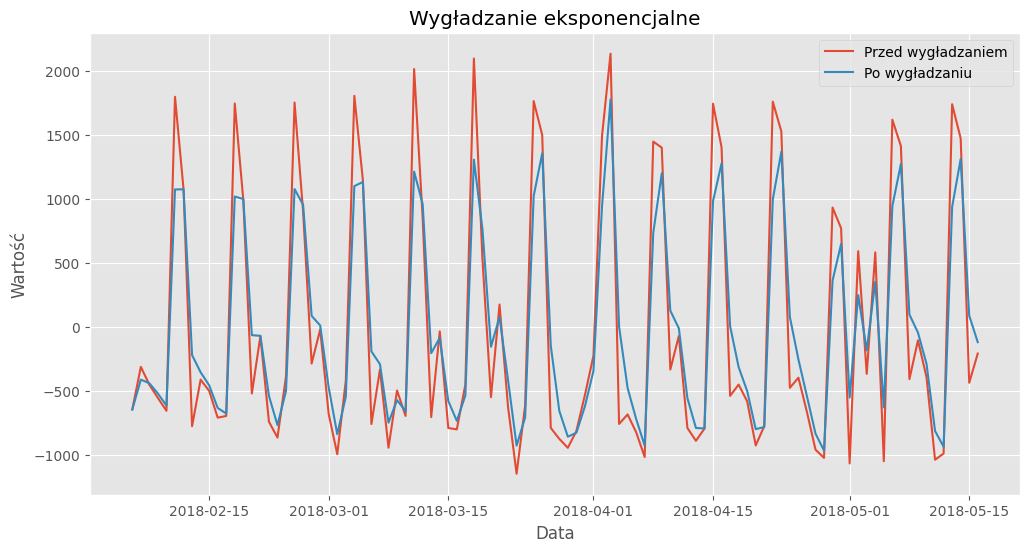

In [29]:
data = pd.DataFrame({
    'DATE': pd.to_datetime(df_diff.index),  
    'WARTOSC_DIFF': df_diff['WARTOSC_DIFF']
})
data = data.sort_values('DATE')
data = data[int(len(data) * 0.25):int(len(data) * 0.35)]
alpha = 0.7 
data['EXP_SMOOTH'] = data['WARTOSC_DIFF'].ewm(alpha=alpha, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['WARTOSC_DIFF'], label='Przed wygładzaniem')
plt.plot(data['DATE'], data['EXP_SMOOTH'], label='Po wygładzaniu')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.title('Wygładzanie eksponencjalne')
plt.legend()
plt.grid(True)
plt.show()

ACF oraz PACF

C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



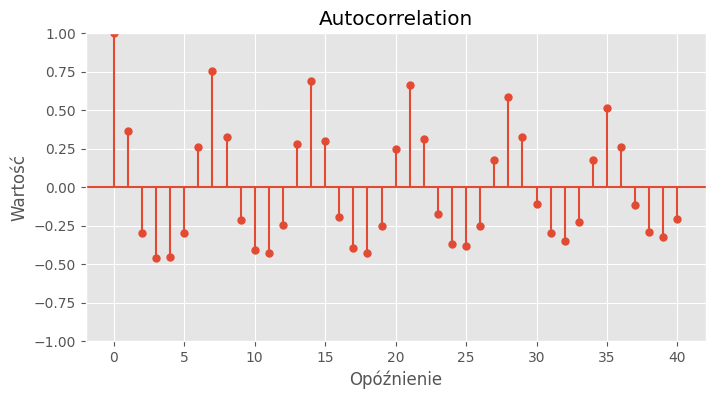

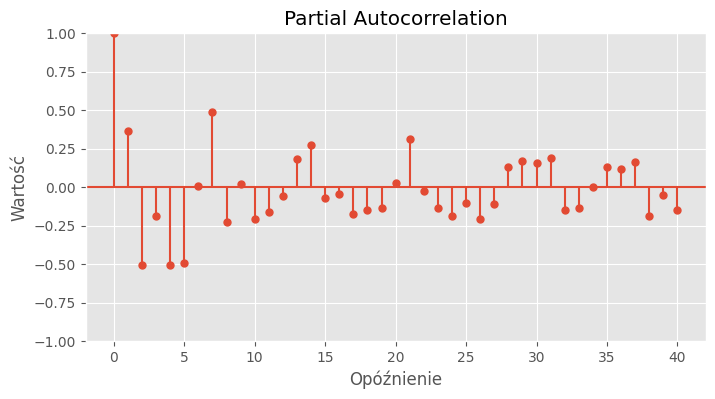

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(data['EXP_SMOOTH'], lags=40, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(data['EXP_SMOOTH'], lags=40, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

plt.show()

POZOSTAŁE NIEUWZGLĘDNIONE W PRACY EKSPERYMTNETY 

In [ ]:
print(df.dtypes)

In [ ]:
print(df['DZIEN'].unique())

In [ ]:
import pandas as pd

df = pd.read_csv('RTV-AGD_awa.csv')
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
poniedzialek = df[df['DZIEN'] == 1]
wtorek = df[df['DZIEN'] == 2]
środa = df[df['DZIEN'] == 3]
czwartek = df[df['DZIEN'] == 4]
piątek = df[df['DZIEN'] == 5]
sobota = df[df['DZIEN'] == 6]
niedziela = df[df['DZIEN'] == 7]

pon = (poniedzialek['WARTOSC(TYS.)'].sum())/1000
wt = (wtorek['WARTOSC(TYS.)'].sum())/1000
sr = (środa['WARTOSC(TYS.)'].sum())/1000
czw = (czwartek['WARTOSC(TYS.)'].sum())/1000
pt = (piątek['WARTOSC(TYS.)'].sum())/1000
sb = (sobota['WARTOSC(TYS.)'].sum())/1000
ndz = (niedziela['WARTOSC(TYS.)'].sum())/1000

In [ ]:
import matplotlib.pyplot as plt

# Dane do wykresu
dni_tygodnia = ['Sobota', 'Niedziela', 'Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek']
wartosci_sprzedazy = [sb, ndz, pon, wt, sr, czw, pt]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(dni_tygodnia, wartosci_sprzedazy)
plt.xlabel('Dzień tygodnia')
plt.ylabel('Wartość sprzedaży (w mln)')
plt.title('Suma wartości sprzedaży w poszczególne dni tygodnia')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RTV-AGD_awa.csv')
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['DATA'] = pd.to_datetime(df['DATA'])
df['MIESIAC'] = df['DATA'].dt.month
suma_sprzedazy_miesiac = df.groupby('MIESIAC')['WARTOSC(TYS.)'].sum()
plt.figure(figsize=(10, 6))
plt.bar(suma_sprzedazy_miesiac.index, suma_sprzedazy_miesiac)
plt.xlabel('Miesiąc')
plt.ylabel('Wartość sprzedaży (w mln)')
plt.title('Suma wartości sprzedaży w poszczególnych miesiącach')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv('RTV-AGD_awa.csv')
df['DATA'] = pd.to_datetime(df['DATA'])
df['DZIEN'] = pd.to_numeric(df['DZIEN'], errors='coerce')
df['TYGODNIA'] = df['DATA'].dt.week
df['DZIEN_TYG'] = df['DATA'].dt.dayofweek
start_week = df['TYGODNIA'].unique()[(df['TYGODNIA'].nunique() // 2) - 11]
end_week = df['TYGODNIA'].unique()[(df['TYGODNIA'].nunique() // 2) - 5]
trimmed_data = df[(df['TYGODNIA'] >= start_week) & (df['TYGODNIA'] <= end_week)]
suma_sprzedazy_dzien = trimmed_data.groupby(['TYGODNIA', 'DZIEN_TYG'])['WARTOSC(TYS.)'].sum().unstack()
fig, ax = plt.subplots(figsize=(10, 4))
suma_sprzedazy_dzien.plot(kind='bar', ax=ax, width=1)
day_labels = [1, 2, 3, 4, 5, 6, 7]
ax.set_xticks(np.arange(len(day_labels)))
ax.set_xticklabels(day_labels)
week_labels = trimmed_data['TYGODNIA'].unique().tolist()
week_labels = [str(w) for w in week_labels]
ax.set_xlabel('Tydzień')
legend_labels = ['Pon', 'Wt', 'Śr', 'Czw', 'Pt', 'Sob', 'Nd']
ax.legend(legend_labels, title='Dzień')
ax.set_ylabel('Wartość sprzedaży (w tys.)')
ax.set_xticklabels(day_labels, rotation=360)
plt.tight_layout()
plt.show()